# Tejas Budhwal (2101AI42)

### Implementation Functions

In [ ]:
import random
import sympy

class RSA:
    """Function to initialize RSA and specify the key size"""
    def __init__(self, key_size=1024):
        self.key_size = key_size
        self.public_key, self.private_key = self.generate_key_pair()

    """Function for generating a large prime number of specified bit size"""
    def generate_large_prime(self, bits):
        return sympy.randprime(2**(bits-1), 2**bits)

    """Function to compute the GCD using Euclidean algorithm"""
    def gcd(self, a, b):
        while b:
            a, b = b, a % b
        return a

    """Function to compute modular inverse using Extended Euclidean Algorithm"""
    def mod_inverse(self, e, phi):
        def egcd(a, b):
            if a == 0:
                return b, 0, 1
            g, x, y = egcd(b % a, a)
            return g, y - (b // a) * x, x

        g, x, _ = egcd(e, phi)
        if g != 1:
            raise ValueError("Modular inverse does not exist")
        return x % phi

    """Generate RSA key pair"""
    def generate_key_pair(self):
        p = self.generate_large_prime(self.key_size // 2)
        q = self.generate_large_prime(self.key_size // 2)
        n = p * q
        phi = (p - 1) * (q - 1)

        e = 65537  # Common public exponent
        if self.gcd(e, phi) != 1:
            raise ValueError("e and phi(n) are not coprime, regenerate primes.")

        d = self.mod_inverse(e, phi)

        public_key = (e, n)
        private_key = (d, n)
        return public_key, private_key

    """Encryption function to encrypt a plaintext message using the public key"""
    def encrypt(self, plaintext):
        e, n = self.public_key
        numeric_representation = [ord(char) for char in plaintext]
        encrypted_blocks = [pow(char, e, n) for char in numeric_representation]
        return encrypted_blocks

    """Decryption function to decrypt an encrypted message using the private key"""
    def decrypt(self, encrypted_blocks):
        d, n = self.private_key
        decrypted_chars = [chr(pow(block, d, n)) for block in encrypted_blocks]
        return "".join(decrypted_chars)

### Example messages

In [ ]:
# Initialize RSA with a 1024-bit key size
rsa = RSA(key_size=1024)

# Test Cases: Different Message Sizes
test_messages = [
    "T",
    "Tejas",
    "RSA Encryption by me!",
    "This is a test message to check RSA encryption using a medium length message",
    "I am Tejas Budhwal and now I am testing for a larger message and hence I will write a longer sentence here so that the test can successfully be conducted to show the results.",
]

for i, message in enumerate(test_messages, start=1):
    print(f"Test {i}: Original Message -> {message}")

    encrypted_message = rsa.encrypt(message)
    print(f"Encrypted Message: {encrypted_message}")

    decrypted_message = rsa.decrypt(encrypted_message)
    print(f"Decrypted Message: {decrypted_message}")

    assert message == decrypted_message, "Decryption failed!\n"
    print("Encryption and Decryption Successful!\n")

Test 1: Original Message -> T
Encrypted Message: [21453560349570137080102972611853495551376787801617060873331304859694819781566441055969308919542025836761684399901063425593510594217351564969076190711208665616009363862251353079358617032919364064745555771745916542725802570060266410306475725780346208327815527311877653885979136531926278169566006939413401062065]
Decrypted Message: T
Encryption and Decryption Successful!

Test 2: Original Message -> Tejas
Encrypted Message: [21453560349570137080102972611853495551376787801617060873331304859694819781566441055969308919542025836761684399901063425593510594217351564969076190711208665616009363862251353079358617032919364064745555771745916542725802570060266410306475725780346208327815527311877653885979136531926278169566006939413401062065, 100146068519225534128279514715015067091255374564198993410689936881971066176009818061590516203359941513502186826271054276642431469872391175890939837900498823480898703535994916159854816159398595660723654914963401580501

### Potential vulnerabilities:

In [ ]:
# Identifying potential vulnerabilities in RSA Encryption

rsa_vulnerabilities = {
    "1. Insufficient Key Length": "Keys smaller than 1024 bits are susceptible to brute-force attacks.",
    "2. Common Public Exponent (e = 65537)": "Although 65537 is widely adopted for efficiency, poorly chosen exponents can weaken encryption strength.",
    "3. Factorization Risks": "If the modulus 𝑛 can be factored into its prime components 𝑝 and 𝑞, the private key can be easily derived.",
    "4. Susceptibility to Timing Attacks": "By measuring the time taken for decryption, attackers may infer details about the private key.",
    "5. Vulnerability to Chosen Ciphertext Attacks": "Manipulating ciphertext strategically can help attackers uncover information about the original plaintext.",
    "6. Weak Randomness in Prime Generation": "Predictable patterns in generating prime numbers 𝑝 and 𝑞 can significantly compromise security."
}

print("Potential RSA Vulnerabilities:\n")
for key, value in rsa_vulnerabilities.items():
    print(f"{key}: {value}")


Potential RSA Vulnerabilities:

1. Insufficient Key Length: Keys smaller than 1024 bits are susceptible to brute-force attacks.
2. Common Public Exponent (e = 65537): Although 65537 is widely adopted for efficiency, poorly chosen exponents can weaken encryption strength.
3. Factorization Risks: If the modulus 𝑛 can be factored into its prime components 𝑝 and 𝑞, the private key can be easily derived.
4. Susceptibility to Timing Attacks: By measuring the time taken for decryption, attackers may infer details about the private key.
5. Vulnerability to Chosen Ciphertext Attacks: Manipulating ciphertext strategically can help attackers uncover information about the original plaintext.
6. Weak Randomness in Prime Generation: Predictable patterns in generating prime numbers 𝑝 and 𝑞 can significantly compromise security.


### Mitigation Strategies

In [ ]:
# Mitigation strategies for securing RSA implementation

rsa_mitigations = {
    "1. Use Stronger Keys": "Employ key sizes of at least 2048 bits to ensure resistance against brute-force attacks. Regularly update cryptographic standards as computational power advances.",
    "2. Secure Exponent Selection": "While 65537 is secure due to its properties, avoid using extremely small or large exponents. Ensure the modulus is large enough to maintain security even with commonly used exponents.",
    "3. Generate Strong Primes": "Use cryptographically secure random number generators (CSPRNGs) to create large, unpredictable prime numbers. Apply primality tests like the Miller-Rabin test to verify prime integrity.",
    "4. Implement Side-Channel Attack Protections": "Design cryptographic operations to execute in constant time, regardless of input values, to prevent timing-based side-channel attacks.",
    "5. Padding Schemes": "Use OAEP (Optimal Asymmetric Encryption Padding) to prevent chosen ciphertext attacks.",
    "6. Use Hybrid Encryption": "Combine RSA with symmetric encryption (AES) to handle large data securely."
}

print("Recommended RSA Security Enhancements:\n")
for key, value in rsa_mitigations.items():
    print(f"{key}: {value}")


Recommended RSA Security Enhancements:

1. Use Stronger Keys: Employ key sizes of at least 2048 bits to ensure resistance against brute-force attacks. Regularly update cryptographic standards as computational power advances.
2. Secure Exponent Selection: While 65537 is secure due to its properties, avoid using extremely small or large exponents. Ensure the modulus is large enough to maintain security even with commonly used exponents.
3. Generate Strong Primes: Use cryptographically secure random number generators (CSPRNGs) to create large, unpredictable prime numbers. Apply primality tests like the Miller-Rabin test to verify prime integrity.
4. Implement Side-Channel Attack Protections: Design cryptographic operations to execute in constant time, regardless of input values, to prevent timing-based side-channel attacks.
5. Padding Schemes: Use OAEP (Optimal Asymmetric Encryption Padding) to prevent chosen ciphertext attacks.
6. Use Hybrid Encryption: Combine RSA with symmetric encrypt

### Impact of Key Size on Key Generation Time

In [ ]:
import time

# RSA key generation time for different key sizes
key_sizes = [512, 1024, 2048, 4096]
generation_times = {}

for size in key_sizes:
    start_time = time.time()
    rsa = RSA(key_size=size)
    end_time = time.time()
    generation_times[size] = end_time - start_time
    print(f"RSA Key Size {size} bits -> Generated in {generation_times[size]:.2f} seconds")

# Analysis
print("\n Observations:")
print("- 512-bit keys are fast but insecure.")
print("- 1024-bit keys are somewhat secure but should be avoided for long-term security.")
print("- 2048-bit keys are the minimum recommended size for secure applications.")
print("- 4096-bit keys provide higher security but slow performance significantly.")

RSA Key Size 512 bits -> Generated in 0.01 seconds
RSA Key Size 1024 bits -> Generated in 0.08 seconds
RSA Key Size 2048 bits -> Generated in 0.65 seconds
RSA Key Size 4096 bits -> Generated in 10.46 seconds

 Observations:
- 512-bit keys are fast but insecure (easily factorable).
- 1024-bit keys are somewhat secure but should be avoided for long-term security.
- 2048-bit keys are the minimum recommended size for secure applications.
- 4096-bit keys provide higher security but slow performance significantly.


### Side Channel Attacks

In [ ]:
side_channel_attacks = {
    "1. Timing Attack": "Measures decryption time to infer private key bits.",
    "2. Power Analysis Attack": "Observes power consumption patterns during encryption.",
    "3. Acoustic Cryptanalysis": "Listens to processor sounds to determine decryption computations.",
    "4. Cache-Based Attack": "Exploits CPU cache access patterns to recover private keys."
}

print("Side-Channel Attacks on RSA:\n")
for key, value in side_channel_attacks.items():
    print(f"{key}: {value}")

# Mitigations
side_channel_mitigations = {
    "1. Use Constant-Time Algorithms": "Prevents attackers from deducing key bits using time variations.",
    "2. Apply Noise & Masking Techniques": "Reduces attack precision by adding randomness.",
    "3. Secure Hardware Implementations": "Use Hardware Security Modules (HSM) or Trusted Platform Modules (TPM) to protect RSA operations.",
    "4. Avoid Direct Key Exposure": "Use hybrid encryption where RSA encrypts symmetric keys only."
}

print("\nMitigation Strategies for Side-Channel Attacks:\n")
for key, value in side_channel_mitigations.items():
    print(f"{key}: {value}")

Side-Channel Attacks on RSA:

1. Timing Attack: Measures decryption time to infer private key bits.
2. Power Analysis Attack: Observes power consumption patterns during encryption.
3. Acoustic Cryptanalysis: Listens to processor sounds to determine decryption computations.
4. Cache-Based Attack: Exploits CPU cache access patterns to recover private keys.

Mitigation Strategies for Side-Channel Attacks:

1. Use Constant-Time Algorithms: Prevents attackers from deducing key bits using time variations.
2. Apply Noise & Masking Techniques: Reduces attack precision by adding randomness.
3. Secure Hardware Implementations: Use TPMs or HSMs to protect RSA operations.
4. Avoid Direct Key Exposure: Use hybrid encryption where RSA encrypts symmetric keys only.


In [ ]:
# Measuring Encryption & Decryption Speeds for Different Input Sizes

import time
import numpy as np

# Function to test encryption and decryption speeds
def test_rsa_performance(key_size, message_size):
    rsa = RSA(key_size=key_size)
    message = ''.join(np.random.choice(list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"), message_size))

    # Measure encryption time
    start_encrypt = time.time()
    ciphertext = rsa.encrypt(message)
    end_encrypt = time.time()
    encryption_time = end_encrypt - start_encrypt

    # Measure decryption time
    start_decrypt = time.time()
    decrypted_message = rsa.decrypt(ciphertext)
    end_decrypt = time.time()
    decryption_time = end_decrypt - start_decrypt

    return encryption_time, decryption_time

# Test for different key sizes and message sizes
key_sizes = [1024, 2048, 4096]
message_sizes = [16, 128, 512, 1024]  # Varying message sizes

results = {}

print("   Key       Message Size    Encryption    Decryption")
for key_size in key_sizes:
    results[key_size] = {}
    for msg_size in message_sizes:
        enc_time, dec_time = test_rsa_performance(key_size, msg_size)
        results[key_size][msg_size] = (enc_time, dec_time)
        print(f"{key_size}-bit   |   {msg_size} bytes   |   {enc_time:.4f}s   |   {dec_time:.4f}s")


   Key       Message Size    Encryption    Decryption
1024-bit   |   16 bytes   |   0.0006s   |   0.0906s
1024-bit   |   128 bytes   |   0.0048s   |   0.6487s
1024-bit   |   512 bytes   |   0.0205s   |   2.6482s
1024-bit   |   1024 bytes   |   0.0370s   |   5.1735s
2048-bit   |   16 bytes   |   0.0017s   |   0.5749s
2048-bit   |   128 bytes   |   0.0191s   |   4.6119s
2048-bit   |   512 bytes   |   0.0616s   |   18.9746s
2048-bit   |   1024 bytes   |   0.1469s   |   40.2312s
4096-bit   |   16 bytes   |   0.0057s   |   3.7583s
4096-bit   |   128 bytes   |   0.0422s   |   33.3334s
4096-bit   |   512 bytes   |   0.1680s   |   129.3579s
4096-bit   |   1024 bytes   |   0.3353s   |   255.3961s


### CPU Time Analysis

In [ ]:
import time

# Function to measure CPU time for RSA operations
def measure_cpu_time():
    start_time = time.process_time()  # Get CPU processing time
    rsa = RSA(key_size=2048)
    message = "Performance Testing of RSA"

    for _ in range(500):  # Reduce iterations to avoid infinite runtime
        encrypted = rsa.encrypt(message)
        decrypted = rsa.decrypt(encrypted)

    end_time = time.process_time()  # Get CPU time after execution
    return end_time - start_time

# Measure CPU time
cpu_time_used = measure_cpu_time()

print(f"🔹 CPU Time Used for RSA Operations: {cpu_time_used:.2f} seconds")

🔹 CPU Time Used for RSA Operations: 456.82 seconds


### Visual Representation of the Analysis

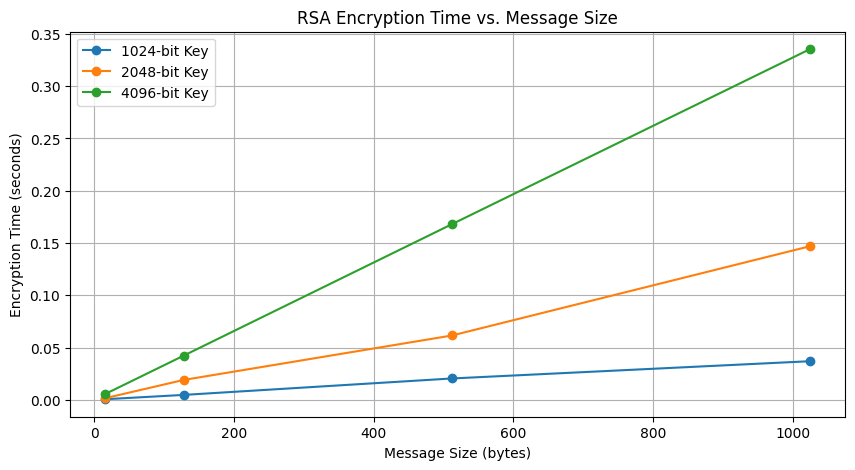

RSA Encryption Time vs Message Size for Three Key Sizes 




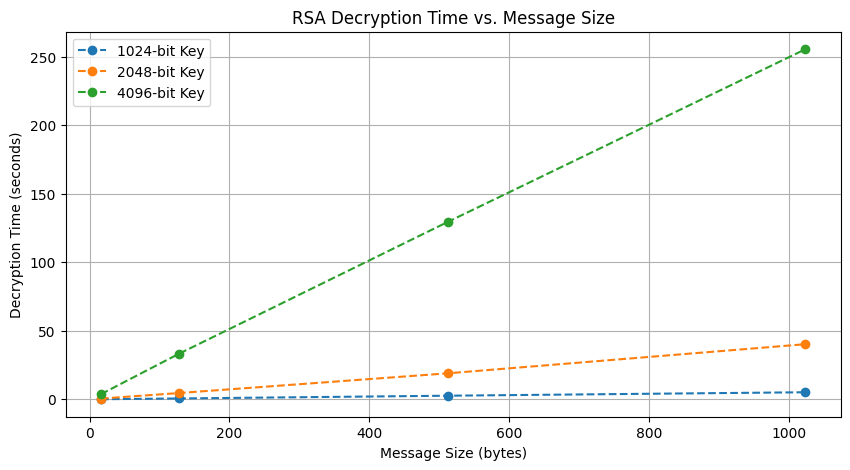

RSA Decryption Time vs Message Size for Three Key Sizes 




In [ ]:
import matplotlib.pyplot as plt

key_sizes = [1024, 2048, 4096]
message_sizes = [16, 128, 512, 1024]
enc_times = [[results[k][m][0] for m in message_sizes] for k in key_sizes]
dec_times = [[results[k][m][1] for m in message_sizes] for k in key_sizes]

# Plot encryption times
plt.figure(figsize=(10, 5))
for i, key in enumerate(key_sizes):
    plt.plot(message_sizes, enc_times[i], marker='o', label=f'{key}-bit Key')

plt.xlabel("Message Size (bytes)")
plt.ylabel("Encryption Time (seconds)")
plt.title("RSA Encryption Time vs. Message Size")
plt.legend()
plt.grid(True)
plt.show()
print("RSA Encryption Time vs Message Size for Three Key Sizes \n\n")

# Plot decryption times
plt.figure(figsize=(10, 5))
for i, key in enumerate(key_sizes):
    plt.plot(message_sizes, dec_times[i], marker='o', linestyle='dashed', label=f'{key}-bit Key')

plt.xlabel("Message Size (bytes)")
plt.ylabel("Decryption Time (seconds)")
plt.title("RSA Decryption Time vs. Message Size")
plt.legend()
plt.grid(True)
plt.show()
print("RSA Decryption Time vs Message Size for Three Key Sizes \n\n")


### RSA Optimization Strategies

In [ ]:
rsa_optimizations = {
    "1. Use Hybrid Encryption": "Use RSA to encrypt symmetric keys (AES) instead of full messages.",
    "2. Increase Key Size Selectively": "2048-bit RSA is a good balance between security and speed.",
    "3. Optimize Prime Number Generation": "Use efficient libraries like OpenSSL for prime generation.",
    "4. Parallel Processing": "Leverage multi-core CPUs for encryption/decryption tasks.",
    "5. Use Fast Modular Exponentiation": "Optimize mathematical operations using Montgomery Multiplication."
}

print("Recommended Optimizations for RSA Performance:\n")
for key, value in rsa_optimizations.items():
    print(f"{key}: {value}")

Recommended Optimizations for RSA Performance:

1. Use Hybrid Encryption: Use RSA to encrypt symmetric keys (AES) instead of full messages.
2. Increase Key Size Selectively: 2048-bit RSA is a good balance between security and speed.
3. Optimize Prime Number Generation: Use efficient libraries like OpenSSL for prime generation.
4. Parallel Processing: Leverage multi-core CPUs for encryption/decryption tasks.
5. Use Fast Modular Exponentiation: Optimize mathematical operations using Montgomery Multiplication.
